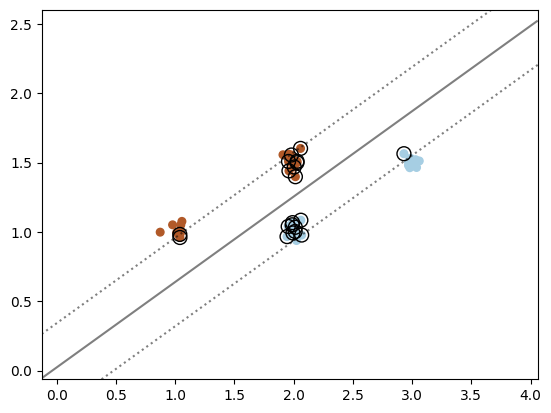

There are no support vectors outside the Margin
Margin Size = 0.271450


In [21]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import numpy.matlib as matlib   
import matplotlib.pyplot as plt

# Task 1: Generating 2D Samples in Gaussian Clusters
# a) Generate 2D samples in four Gaussian clusters
#np.random.normal function generates random samples from a normal distribution with the following format
# loc: Mean (“centre”) of the distribution, tuple x,y coordinates
# scale: Standard deviation (spread or “width”) of the distribution.
# size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# For the size 10,2 was selected because we want 10 samples of 2 dimensions x,y

cluster1 = np.random.normal(loc=[1, 1], scale=0.04, size=(10, 2)) 
cluster2 = np.random.normal(loc=[2, 1.5], scale=0.04, size= (10, 2)) 
cluster3 = np.random.normal(loc=[2, 1], scale=0.04, size= (10, 2))
cluster4 = np.random.normal(loc=[3, 1.5], scale=0.04, size= (10, 2))

# Combine clusters arrays vertically (vstack)
# Label the clusters with 1 and -1
X = np.vstack([cluster1, cluster2, cluster3, cluster4]) # 40 samples of 2 dimensions x,y
y = np.array([1]*20 + [-1]*20) # 1 for cluster1 and cluster2, -1 for cluster3 and cluster4

# b) Train a linear SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# # c) Extract Parameters and Graphical Representation
sv = clf.support_vectors_ # Get support vectors themselves
lagrange_multipliers = np.abs(clf.dual_coef_).reshape(-1) # Get lagrange multipliers constrained a > 0 (abs to remove possible -0.0)
yi = y[clf.support_] # Get labels of support vectors

# # Compute primal parameters   
w = clf.coef_[0] # Get weights
b = clf.intercept_ # Get intercept
a = -w[0]/w[1] # Slope of the separating line
mrg = 1/np.linalg.norm(w) # Margin


# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["dotted", "-", "dotted"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    )
plt.show()


# Checking if the support vectors are outside the margin and printing the margin size
MERR = 0
for l in range(sv[:,1].size):
    yy = a*(sv[:,0][l]) + (b[0]/w[1]); yyuml = yy + mrg/a; yylml = yy -  mrg/a
    if sv[:,1][l] > yyuml:
        print(f"WARN - Support vector {l:.0f} with value {sv[:,0][l]:.3f},{sv[:,1][l]:.3f} is ABOVE the UPPER mrg {sv[:,0][l]:.3f},{yyuml:.3f}"); MERR += 1
    elif sv[:,1][l] < yylml:    
        print(f"WARN - Support vector {l:.0f} with value {sv[:,0][l]:.3f},{sv[:,1][l]:.3f} is BELOW the LOWER mrg {sv[:,0][l]:.3f},{yylml:.3f}"); MERR += 1
    elif l == sv[:,1].size - 1 and MERR == 0: print("There are no support vectors outside the Margin")
print(f"Margin Size = {mrg:f}")




In [3]:
import numpy as np

import numpy.matlib as matlib

import matplotlib.pyplot as plt

def data(N,sigma):   

    w=np.ones(10)/np.sqrt(10)   

    w1=[1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   

    w2=[-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   

    x=np.zeros((4,10))   

    x[1,:]=x[0,:]+sigma*w1   

    x[2,:]=x[0,:]+sigma*w2   

    x[3,:]=x[2,:]+sigma*w1   

    X1=x+sigma*matlib.repmat(w,4,1)/2   

    X2=x-sigma*matlib.repmat(w,4,1)/2   

    X1=matlib.repmat(X1,2*N,1)   

    X2=matlib.repmat(X2,2*N,1)   

    X=np.concatenate((X1, X2), axis=0)   

    Y=np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   

    Z=np.random.permutation(16*N)   

    Z=Z[:N]   

    X=X[Z,:]   

    X=X+0.2*sigma*np.random.randn(N,10)   

    Y=Y[Z]

    return X,Y



AttributeError: 'tuple' object has no attribute 'shape'